In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load dataset into pandas dataframe
file = ('Data/NYPD_Arrests_Data_cleaned.csv')
arrests_df = pd.read_csv(file)
pd.set_option('display.max_columns', None)
arrests_df.head(10)

,ARREST_KEY,ARREST_DATE,day,month,year,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
0,159838726,2017-01-01,1,1,2017,RECKLESS ENDANGERMENT 2,OFFENSES AGAINST THE PERSON,M,M,14,0,18-24,M,WHITE,40.750350,-73.983175,POINT (-73.98317545899994 40.750350440000034)
1,159824786,2017-01-01,1,1,2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,M,18,0,25-44,M,WHITE,40.762971,-73.971870,POINT (-73.97186979099996 40.76297132000008)
2,159840237,2017-01-01,1,1,2017,"FORGERY,ETC.,UNCLASSIFIED-FELONY",FORGERY,F,B,40,0,25-44,M,WHITE HISPANIC,40.807919,-73.919017,POINT (-73.91901728199997 40.80791877300004)
3,159828861,2017-01-01,1,1,2017,BAIL JUMPING 3,OFFENSES AGAINST PUBLIC ADMINISTRATION,M,K,67,0,25-44,M,BLACK,40.650740,-73.910667,POINT (-73.91066707899995 40.650739599000076)
4,159834533,2017-01-01,1,1,2017,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,M,K,60,0,18-24,M,BLACK,40.573763,-73.992878,POINT (-73.99287775699997 40.573763375000055)
5,159828207,2017-01-01,1,1,2017,"MISCHIEF,CRIMINAL UNCLASSIFIED 4TH DEG",CRIMINAL MISCHIEF & RELATED OFFENSES,M,Q,113,0,25-44,M,BLACK,40.675403,-73.792898,POINT (-73.79289777099996 40.67540344900006)
6,159830434,2017-01-01,1,1,2017,RESISTING ARREST,OFFENSES AGAINST PUBLIC ADMINISTRATION,M,B,47,0,25-44,M,BLACK HISPANIC,40.881793,-73.863713,POINT (-73.86371337599996 40.88179268700002)
7,159824774,2017-01-01,1,1,2017,ALCOHOLIC BEVERAGE CONTROL LAW,ALCOHOLIC BEVERAGE CONTROL LAW,M,K,77,0,45-64,M,BLACK,40.678444,-73.947757,POINT (-73.94775722799994 40.678443525000034)
8,159826602,2017-01-01,1,1,2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,M,9,2,25-44,F,BLACK,40.724793,-73.976785,POINT (-73.97678528999995 40.72479293300007)
9,159830431,2017-01-01,1,1,2017,RESISTING ARREST,OFFENSES AGAINST PUBLIC ADMINISTRATION,M,B,47,0,18-24,M,BLACK,40.881793,-73.863713,POINT (-73.86371337599996 40.88179268700002)


In [17]:
# show the number of unique values of each column. the arrest_key column will show the total number of arrests
arrests_df.nunique()

ARREST_KEY           1031489
ARREST_DATE             1826
day                       31
month                     12
year                       5
PD_DESC                  384
OFNS_DESC                 82
LAW_CAT_CD                 4
ARREST_BORO                5
ARREST_PRECINCT           77
JURISDICTION_CODE         26
AGE_GROUP                  5
PERP_SEX                   2
PERP_RACE                  7
Latitude               77773
Longitude              79376
Lon_Lat                92691
dtype: int64

In [23]:
# show each law category
arrests_df.LAW_CAT_CD.unique()

array(['M', 'F', 'V', 'I'], dtype=object)

In [18]:
felony_df = arrests_df[arrests_df['LAW_CAT_CD'] == 'F']
felony_df.head()

,ARREST_KEY,ARREST_DATE,day,month,year,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
2,159840237,2017-01-01,1,1,2017,"FORGERY,ETC.,UNCLASSIFIED-FELONY",FORGERY,F,B,40,0,25-44,M,WHITE HISPANIC,40.807919,-73.919017,POINT (-73.91901728199997 40.80791877300004)
10,159838728,2017-01-01,1,1,2017,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,Q,105,0,18-24,F,BLACK,40.670704,-73.755130,POINT (-73.75512960799995 40.670704301000065)
13,159824170,2017-01-01,1,1,2017,"ROBBERY,UNCLASSIFIED,OPEN AREAS",ROBBERY,F,B,47,0,25-44,M,WHITE HISPANIC,40.875247,-73.859717,POINT (-73.85971668999997 40.87524729200004)
18,159830432,2017-01-01,1,1,2017,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,B,47,0,25-44,M,BLACK,40.881793,-73.863713,POINT (-73.86371337599996 40.88179268700002)
19,159840202,2017-01-01,1,1,2017,"PUBLIC ADMINISTRATION,UNCLASSIFIED FELONY",MISCELLANEOUS PENAL LAW,F,B,52,0,18-24,F,WHITE HISPANIC,40.879868,-73.880392,POINT (-73.88039168099994 40.87986793400006)


In [19]:
# show the number of unique values
felony_df.nunique()

ARREST_KEY           393711
ARREST_DATE            1826
day                      31
month                    12
year                      5
PD_DESC                 198
OFNS_DESC                45
LAW_CAT_CD                1
ARREST_BORO               5
ARREST_PRECINCT          77
JURISDICTION_CODE        24
AGE_GROUP                 5
PERP_SEX                  2
PERP_RACE                 7
Latitude              53559
Longitude             54446
Lon_Lat               61293
dtype: int64

In [20]:
misdemeanor_df = arrests_df[arrests_df['LAW_CAT_CD'] == 'M']
misdemeanor_df.head()

,ARREST_KEY,ARREST_DATE,day,month,year,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
0,159838726,2017-01-01,1,1,2017,RECKLESS ENDANGERMENT 2,OFFENSES AGAINST THE PERSON,M,M,14,0,18-24,M,WHITE,40.750350,-73.983175,POINT (-73.98317545899994 40.750350440000034)
1,159824786,2017-01-01,1,1,2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,M,18,0,25-44,M,WHITE,40.762971,-73.971870,POINT (-73.97186979099996 40.76297132000008)
3,159828861,2017-01-01,1,1,2017,BAIL JUMPING 3,OFFENSES AGAINST PUBLIC ADMINISTRATION,M,K,67,0,25-44,M,BLACK,40.650740,-73.910667,POINT (-73.91066707899995 40.650739599000076)
4,159834533,2017-01-01,1,1,2017,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,M,K,60,0,18-24,M,BLACK,40.573763,-73.992878,POINT (-73.99287775699997 40.573763375000055)
5,159828207,2017-01-01,1,1,2017,"MISCHIEF,CRIMINAL UNCLASSIFIED 4TH DEG",CRIMINAL MISCHIEF & RELATED OFFENSES,M,Q,113,0,25-44,M,BLACK,40.675403,-73.792898,POINT (-73.79289777099996 40.67540344900006)


In [21]:
# show number of unique values
misdemeanor_df.nunique()

ARREST_KEY           622748
ARREST_DATE            1826
day                      31
month                    12
year                      5
PD_DESC                 145
OFNS_DESC                47
LAW_CAT_CD                1
ARREST_BORO               5
ARREST_PRECINCT          77
JURISDICTION_CODE        26
AGE_GROUP                 5
PERP_SEX                  2
PERP_RACE                 7
Latitude              67243
Longitude             68407
Lon_Lat               78315
dtype: int64

In [25]:
# since about 99% of the are either felonies or misdemeanors we will only focus on those and drop the others

FM_arrest_df = arrests_df[(arrests_df['LAW_CAT_CD'] == 'F') | (arrests_df['LAW_CAT_CD'] == 'M')]
FM_arrest_df.head()

,ARREST_KEY,ARREST_DATE,day,month,year,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
0,159838726,2017-01-01,1,1,2017,RECKLESS ENDANGERMENT 2,OFFENSES AGAINST THE PERSON,M,M,14,0,18-24,M,WHITE,40.750350,-73.983175,POINT (-73.98317545899994 40.750350440000034)
1,159824786,2017-01-01,1,1,2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,M,18,0,25-44,M,WHITE,40.762971,-73.971870,POINT (-73.97186979099996 40.76297132000008)
2,159840237,2017-01-01,1,1,2017,"FORGERY,ETC.,UNCLASSIFIED-FELONY",FORGERY,F,B,40,0,25-44,M,WHITE HISPANIC,40.807919,-73.919017,POINT (-73.91901728199997 40.80791877300004)
3,159828861,2017-01-01,1,1,2017,BAIL JUMPING 3,OFFENSES AGAINST PUBLIC ADMINISTRATION,M,K,67,0,25-44,M,BLACK,40.650740,-73.910667,POINT (-73.91066707899995 40.650739599000076)
4,159834533,2017-01-01,1,1,2017,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,M,K,60,0,18-24,M,BLACK,40.573763,-73.992878,POINT (-73.99287775699997 40.573763375000055)


<AxesSubplot:xlabel='AGE_GROUP', ylabel='count'>

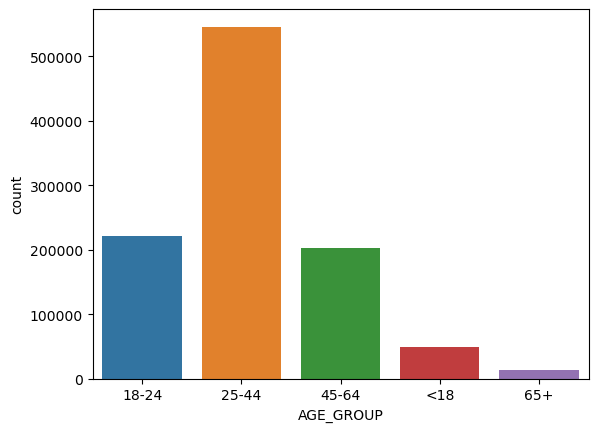

In [29]:
# Barplot of arrests by age group
import seaborn as sns

sns.countplot(x='AGE_GROUP', data=arrests_df)


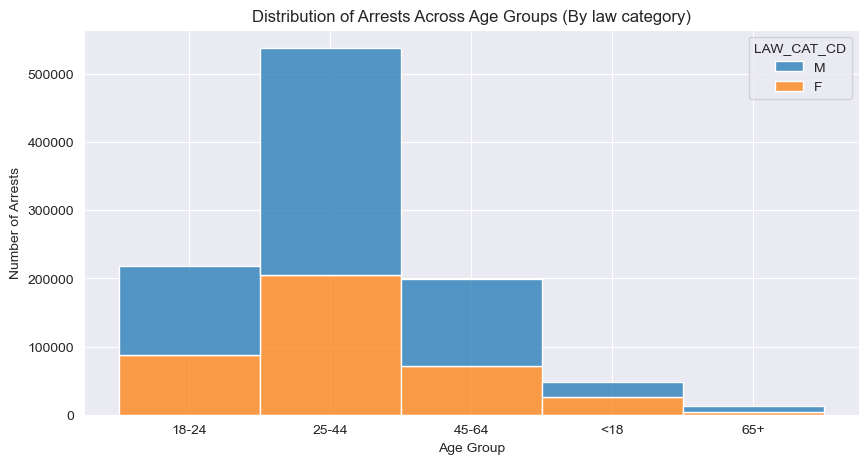

In [35]:
# histogram showing the distribution of arrests across age groups
plt.figure(figsize=(10, 5))
sns.histplot(data=FM_arrest_df, x='AGE_GROUP', hue='LAW_CAT_CD', multiple='stack')
plt.title('Distribution of Arrests Across Age Groups (By law category)')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.show()

<AxesSubplot:xlabel='ARREST_BORO', ylabel='count'>

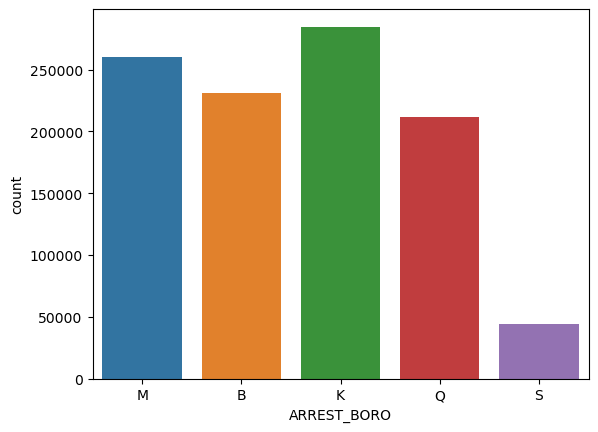

In [32]:
# Barplot of arrests by age group
sns.countplot(x='ARREST_BORO', data=arrests_df)


<AxesSubplot:xlabel='MONTH', ylabel='YEAR'>

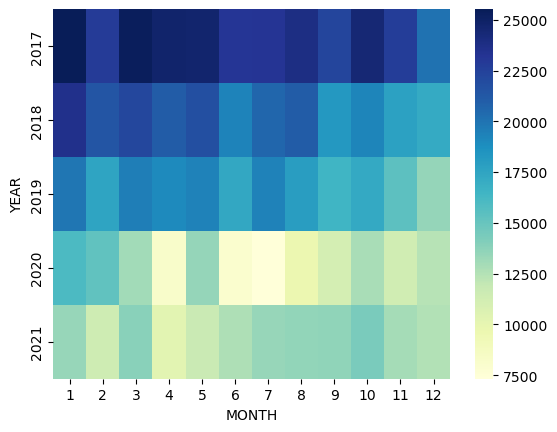

In [33]:
# heatmap of arrests by month and year

arrests_df['ARREST_DATE'] = pd.to_datetime(arrests_df['ARREST_DATE'])
arrests_df['YEAR'] = arrests_df['ARREST_DATE'].dt.year
arrests_df['MONTH'] = arrests_df['ARREST_DATE'].dt.month

arrests_by_month_year = arrests_df.groupby(['YEAR', 'MONTH']).size().reset_index(name='count')
arrests_by_month_year = arrests_by_month_year.pivot('YEAR', 'MONTH', 'count')
sns.heatmap(arrests_by_month_year, cmap="YlGnBu")

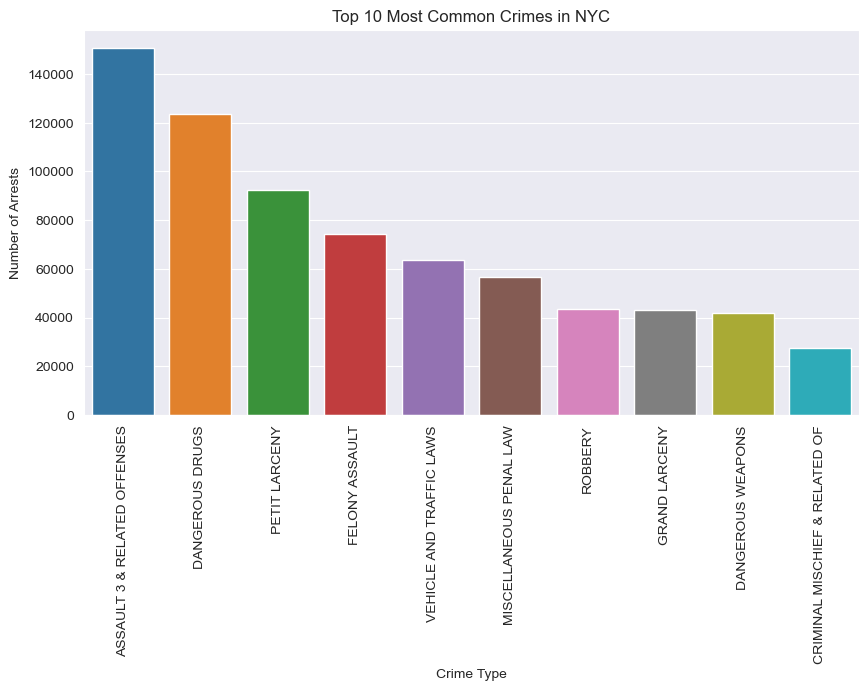

In [34]:
# Bar chart showing the number of arrests for each crime type
sns.set_style('darkgrid')

plt.figure(figsize=(10, 5))
sns.countplot(x='OFNS_DESC', data=arrests_df, order=arrests_df['OFNS_DESC'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Most Common Crimes in NYC')
plt.xlabel('Crime Type')
plt.ylabel('Number of Arrests')
plt.show()

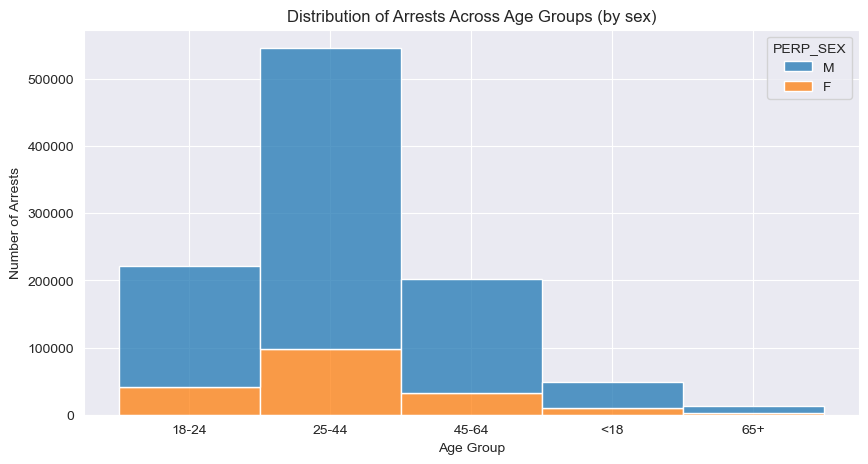

In [36]:
# histogram showing the distribution of arrests across age groups
plt.figure(figsize=(10, 5))
sns.histplot(data=arrests_df, x='AGE_GROUP', hue='PERP_SEX', multiple='stack')
plt.title('Distribution of Arrests Across Age Groups (by sex)')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.show()


In [38]:
# Filter the dataset to only include violent crimes and show the number of violent crimes
violent_crimes = FM_arrest_df[FM_arrest_df['OFNS_DESC'].str.contains('ASSAULT|ROBBERY|MURDER')]
print(violent_crimes['ARREST_KEY'].nunique())
violent_crimes.head()

273954


,ARREST_KEY,ARREST_DATE,day,month,year,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,Lon_Lat
1,159824786,2017-01-01,1,1,2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,M,18,0,25-44,M,WHITE,40.762971,-73.971870,POINT (-73.97186979099996 40.76297132000008)
8,159826602,2017-01-01,1,1,2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,M,9,2,25-44,F,BLACK,40.724793,-73.976785,POINT (-73.97678528999995 40.72479293300007)
10,159838728,2017-01-01,1,1,2017,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,Q,105,0,18-24,F,BLACK,40.670704,-73.755130,POINT (-73.75512960799995 40.670704301000065)
13,159824170,2017-01-01,1,1,2017,"ROBBERY,UNCLASSIFIED,OPEN AREAS",ROBBERY,F,B,47,0,25-44,M,WHITE HISPANIC,40.875247,-73.859717,POINT (-73.85971668999997 40.87524729200004)
18,159830432,2017-01-01,1,1,2017,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,B,47,0,25-44,M,BLACK,40.881793,-73.863713,POINT (-73.86371337599996 40.88179268700002)


In [39]:
violent_crimes.shape

(273954, 17)

In [40]:
import folium
from folium.plugins import HeatMap
# Create a map centered on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Create a HeatMap layer with the filtered data
HeatMap(data=violent_crimes[['Latitude', 'Longitude']].groupby(violent_crimes['Latitude']).first().values.tolist(), 
        radius=10).add_to(nyc_map)

# Display the map
nyc_map